In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df = pd.read_csv("Housing.csv")

# EDA

The dependent column is the price

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df=pd.get_dummies(df)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


In [8]:
nan_count = df.isna().sum()
print(nan_count)

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_no                        0
mainroad_yes                       0
guestroom_no                       0
guestroom_yes                      0
basement_no                        0
basement_yes                       0
hotwaterheating_no                 0
hotwaterheating_yes                0
airconditioning_no                 0
airconditioning_yes                0
prefarea_no                        0
prefarea_yes                       0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


# Outliers

<Axes: xlabel='price'>

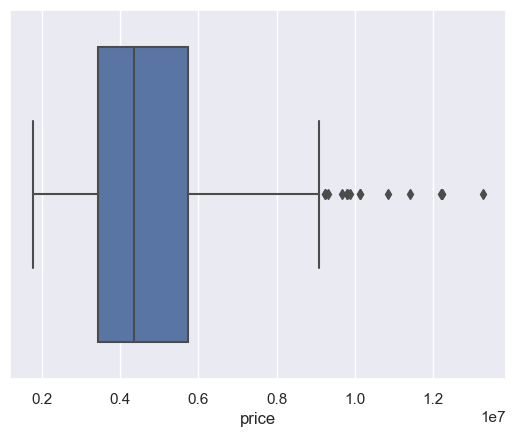

In [9]:
sns.boxplot(x=df["price"])


<Axes: xlabel='area'>

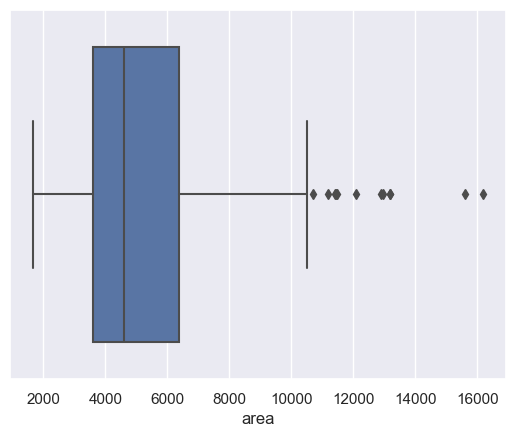

In [10]:
sns.boxplot(x=df["area"])

# Price vs area

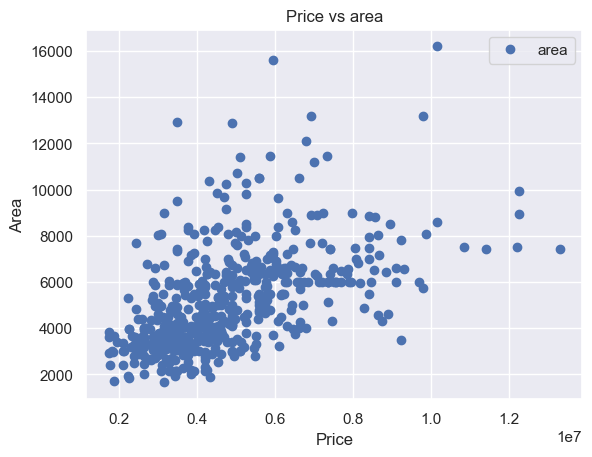

In [11]:
df.plot(x="price", y="area", style='o')
plt.title("Price vs area")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()


C:\Users\Alina\AppData\Local\Temp\ipykernel_25512\362396776.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\Alina\anaconda3\envs\DataAnalytics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

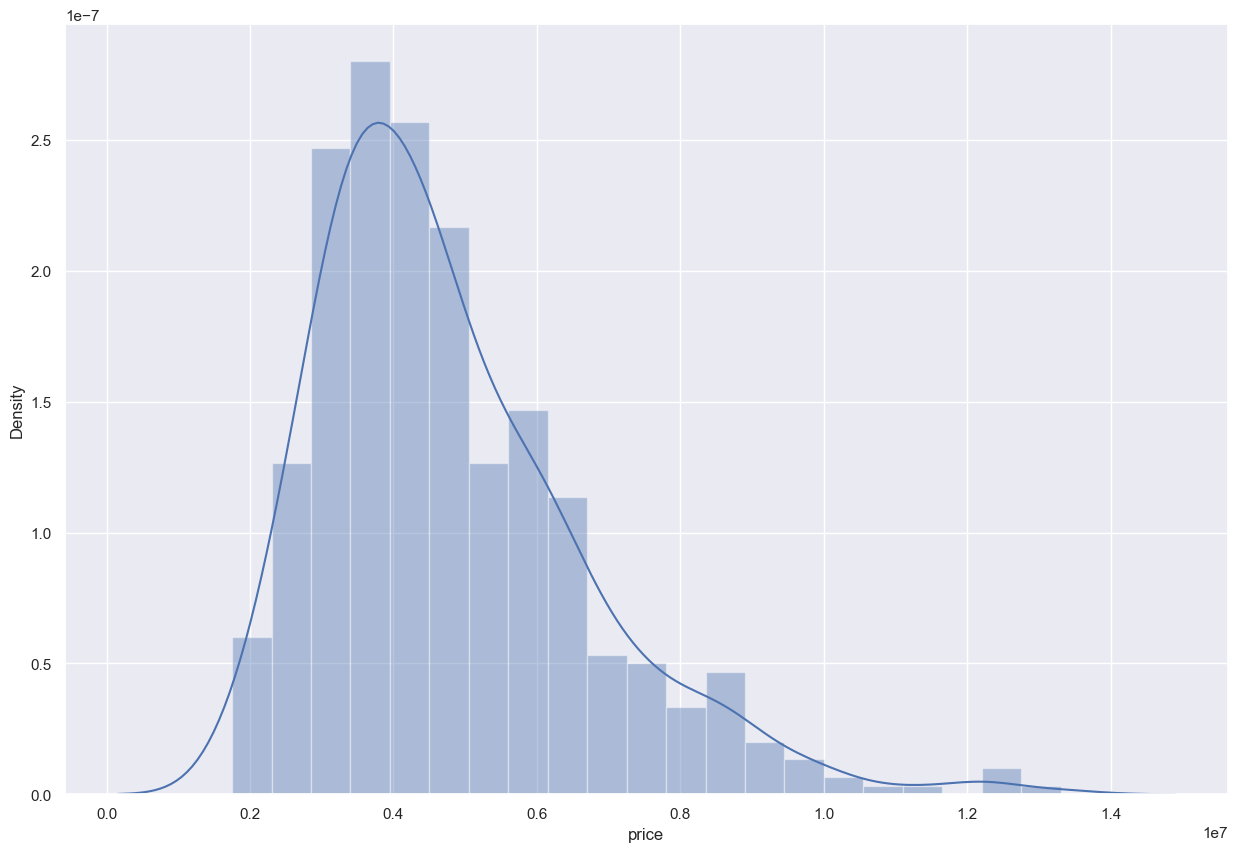

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['price'])

C:\Users\Alina\AppData\Local\Temp\ipykernel_25512\3509988528.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\Alina\anaconda3\envs\DataAnalytics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

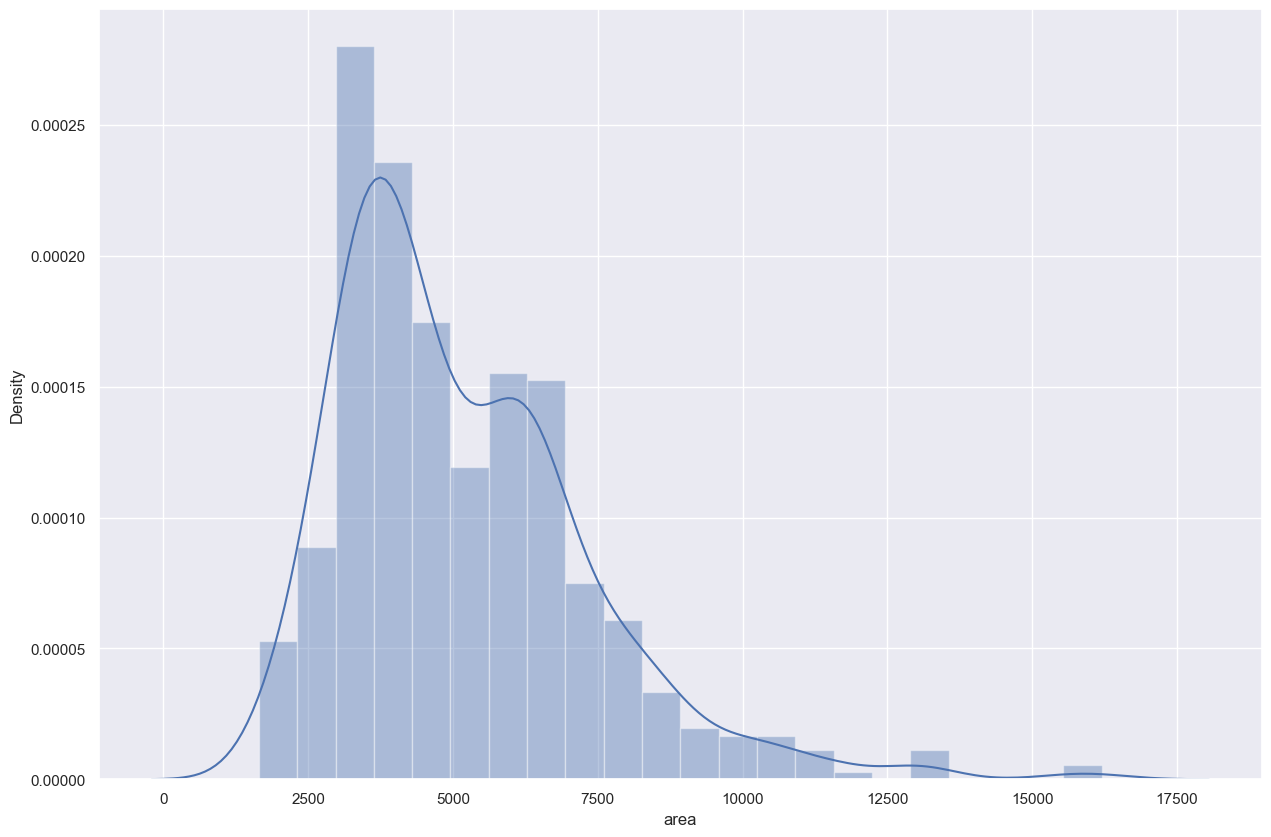

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['area'])

In [14]:
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling

In [15]:
from sklearn.preprocessing import RobustScaler
sc =  RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor
import functions.utils

ModuleNotFoundError: No module named 'functions'

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, max_features="sqrt", max_depth=5, random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

print("Metrics for the Training Data:")
functions.utils.displayRegressionMetrics(y_train, y_train_pred)
print("\n")
print("Metrics for the Validation/Test Data:")
functions.utils.displayRegressionMetrics(y_test, y_pred)

<Axes: xlabel='price'>

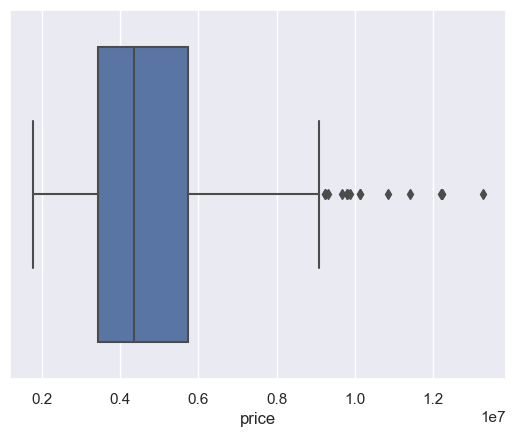

In [10]:
sns.boxplot(x=df["price"])

In [17]:
functions.utils.plotSVRFeatureImportance(svr_model.dual_coef_.ravel(), X)


NameError: name 'functions' is not defined